# 신경망의 추론

## 미니배치 버전 파이썬 구현

In [1]:
import numpy as np

W1 = np.random.rand(2, 4)

In [2]:
W1

array([[0.3795992 , 0.74358171, 0.63090108, 0.54630072],
       [0.68828044, 0.05956848, 0.57674169, 0.46685474]])

In [3]:
b1 = np.random.rand(4)
print(b1.shape)

(4,)


In [4]:
b1

array([0.07137378, 0.09348261, 0.56185016, 0.19008728])

In [5]:
x = np.random.rand(10, 2)

In [6]:
x

array([[0.12830978, 0.13501293],
       [0.48775499, 0.12132483],
       [0.96471826, 0.08949036],
       [0.28710462, 0.5166599 ],
       [0.39004025, 0.82942224],
       [0.23651269, 0.40522106],
       [0.97128587, 0.37512076],
       [0.33645675, 0.44280837],
       [0.92214738, 0.84163656],
       [0.34812868, 0.83855293]])

In [7]:
h = np.matmul(x, W1) + b1  # (10,2)(2,4)+(4,)

# 행렬곱

In [8]:
print(h.shape)
print(h)

(10, 4)
[[0.21300682 0.19693394 0.72066853 0.32321443]
 [0.34003068 0.46339543 0.9395484  0.51318925]
 [0.49917451 0.81616027 1.22210477 0.75889255]
 [0.53596536 0.337745   1.04096408 0.58813786]
 [0.79030784 0.43291683 1.28628936 0.79038625]
 [0.44005953 0.29348753 0.94477415 0.5084737 ]
 [0.69826139 0.83805839 1.39098324 0.89582835]
 [0.50386882 0.37004312 1.02950714 0.58062103]
 [1.00070216 0.82930955 1.62904083 1.08677907]
 [0.78068272 0.40229605 1.26511336 0.77175264]]


## 시그모이드 함수

In [10]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

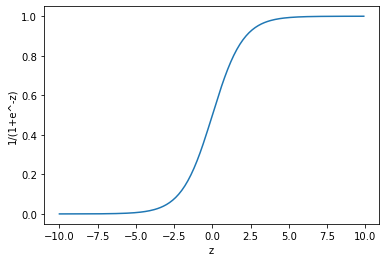

In [11]:
import matplotlib.pyplot as plt
zs = np.arange(-10., 10., 0.1)
gs = [sigmoid(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

In [9]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

x = np.random.rand(10, 2)
W1 = np.random.randn(2, 4)
b1 = np.random.rand(4)
W2 = np.random.randn(4, 3)
b2 = np.random.rand(3)

h = np.matmul(x, W1) + b1  # (10,2)(2,4)+(4,) => 은닉층
a = sigmoid(h)             # (10,4)           => 시그모이드 
s = np.matmul(a, W2) + b2  # (10,4)(4,3)+(3,) => 출력층

In [10]:
print(h.shape)
print(h)

(10, 4)
[[ 1.54515991  1.42422418  0.16892358 -0.27751333]
 [ 1.75090056  1.87917809  0.40217806 -0.83949968]
 [ 0.92981121  1.88769945  1.01020316 -0.65141898]
 [ 0.55324171  1.34952211  0.83174497  0.0454365 ]
 [ 0.82066566  1.80772092  1.02259984 -0.53505524]
 [ 0.69817814  1.60099717  0.9378353  -0.27271531]
 [ 0.62424179  1.71587124  1.08884818 -0.38430754]
 [ 1.58829235  2.11000168  0.71589385 -1.06034791]
 [ 1.75323008  2.03601401  0.53278267 -1.01671834]
 [ 0.9438298   1.37909745  0.57088036 -0.08191168]]


In [11]:
print(a.shape)
print(a)

(10, 4)
[[0.82421357 0.80599978 0.54213076 0.43106352]
 [0.85206635 0.86751669 0.59921085 0.30164017]
 [0.71703698 0.868493   0.73305991 0.34266984]
 [0.63488737 0.79405149 0.69672377 0.51135717]
 [0.69437762 0.8590862  0.73547871 0.36933861]
 [0.66778372 0.83215771 0.71866219 0.43224061]
 [0.65118266 0.84759626 0.74816476 0.40508839]
 [0.83037571 0.8918715  0.67170218 0.25724297]
 [0.85235975 0.88452677 0.63013189 0.26566712]
 [0.71987261 0.79884601 0.63896629 0.47953352]]


In [24]:
print(s.shape)
print(s) # 시그모이드 -> 모든 값이 0~1사이 값으로 변환됨

(10, 3)
[[-0.35717499  0.11651739  0.1536909 ]
 [-0.063664   -0.0232528   0.24150763]
 [-0.44229311  0.10717764  0.12231435]
 [ 0.87917556  0.09189693  0.606493  ]
 [ 0.26108331  0.13472499  0.37866988]
 [ 0.19764355  0.15272128  0.35804612]
 [ 0.18898391 -0.03512675  0.32989685]
 [-0.32519422  0.0832779   0.16101362]
 [ 0.14984754  0.10511372  0.33389582]
 [ 0.9290695   0.07265787  0.6221152 ]]


## 계층으로 클래스화 및 순전파 구현

### 파이썬 참조 계수

In [12]:
import sys
a = np.array([1,2,3])
print( sys.getrefcount(a) )
b = a
print( sys.getrefcount(a) )
print(b)
b[1] = 10
print(b)
print(a)
del b
print( sys.getrefcount(a) )

2
3
[1 2 3]
[ 1 10  3]
[ 1 10  3]
2


In [13]:
import sys

def foo():
    print('foo()')

foo()
print( sys.getrefcount(foo) )
bar = foo
print( sys.getrefcount(bar) )
bar()
del bar
print( sys.getrefcount(foo) )

foo()
2
3
foo()
2


In [14]:
import numpy as np

class Sigmoid:
    def __init__(self):
        self.params = []

    def forward(self, x):
        return 1 / (1 + np.exp(-x))


class Affine:
    def __init__(self, W, b):
        self.params = [W, b]

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [15]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 가중치와 편향 초기화
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)

        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모은다.
        self.params = []
        for layer in self.layers:
            self.params += layer.params

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [16]:
a = ['A', 'B']
a += ['C', 'D']
a

['A', 'B', 'C', 'D']

In [41]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
print(s.shape)
print(s)
# 출력 결과: 샘플 당 3개의 분류가 있다는 것임

(10, 3)
[[ 0.12855732 -2.15781098  1.50431475]
 [ 0.81151884 -1.76701496  0.99523067]
 [ 0.43198568 -2.50936758  0.40959629]
 [ 0.27643667 -2.30569528  0.99838863]
 [ 0.46974422 -2.47279748  0.39949309]
 [ 0.60644197 -2.33127821  0.5211233 ]
 [ 0.67534542 -2.17559657  0.53321426]
 [ 0.33106789 -2.1663744   1.12407338]
 [ 0.28909134 -2.36936776  0.89483068]
 [ 0.52631543 -1.99989377  1.06910849]]
